<h3>Project Goal: Flower Image Classification Using TensorFlow</h3>

In this project, the objective is to develop a flower image classification system using the TensorFlow deep learning framework. The aim is to accurately categorize flower images into five distinct classes:

- Daisy
- Dandelion
- Roses
- Sunflowers
- Tulips

<h2>To achieve this goal, the project will be executed in three stages:</h2>

1. Standard Model Development: A standard deep learning model will be constructed using TensorFlow. This initial model will serve as a baseline for comparison and performance evaluation.

2. Overfitting Mitigation: Various techniques will be employed to address the issue of overfitting, a common challenge in deep learning. These techniques may include regularization, dropout, or early stopping. By implementing these strategies, an improved model will be developed to enhance the classification accuracy.

3. Data Expansion: To further enhance the model's performance, a larger dataset will be created by scraping flower images from the internet. Approximately 5,000 images will be collected, with approximately 1,000 images per flower class. This expanded dataset will be used for training the final model, enabling it to learn from a more diverse set of examples and potentially improve its classification accuracy.

By following this approach, the project aims to develop a robust flower image classification system that can accurately categorize flower images into their respective classes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import TensorFlow and other libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

# Download the dataset

we'll uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:

```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

##### Deatials

This code above is performs the following tasks:

1. It imports the `pathlib` module, which provides a convenient way to handle file paths and directories.

2. It defines a variable `dataset_url` that contains a URL pointing to a dataset of flower photos.
3. It uses the `tf.keras.utils.get_file()` function to download the dataset from the provided URL. This function takes the URL (the address) and a name for the dataset. It also specifies that the dataset is in a compressed format called a "tar" file.
4. The function returns the path to the downloaded and extracted dataset, which is then assigned to the variable `data_dir`.
5. Finally, the `data_dir` variable is converted into a `pathlib.Path` object, which allows for easy manipulation of paths and directories.

A tar archive is a file that contains other files and directories.

The `untar` argument of the `tf.keras.utils.get_file` function specifies whether the downloaded file should be extracted (unzipped) after being downloaded. When set to `True`, the function will extract the contents of the downloaded file to a local directory². The `origin` argument specifies the URL from where the file should be downloaded². In this case, `origin=dataset_url` means that the file will be downloaded from the URL specified by the `dataset_url` variable.


If the `untar` argument of the `tf.keras.utils.get_file` function is set to `False`, it means that the downloaded file will not be extracted (unzipped) after being downloaded. The file will remain in its compressed form. 

difference between tar and zip

Sure! `tar` and `zip` are both ways to store multiple files together in one file. The main difference between them is that `tar` stores the files together without compressing them, while `zip` stores the files together and also compresses them to take up less space.

# Explore some images

 There are 3,670 total images

In [5]:
total_images = len(list(data_dir.glob('*/*.jpg')))
total_images

3670

In [6]:
## found the total images per class
names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
for i in range(len(names)):
  print(f"Total Images for {names[i] :} { len(list(data_dir.glob(f'{names[i]}/*')))}  \n")

Total Images for daisy 633  

Total Images for dandelion 898  

Total Images for roses 641  

Total Images for sunflowers 699  

Total Images for tulips 799  



some roses:

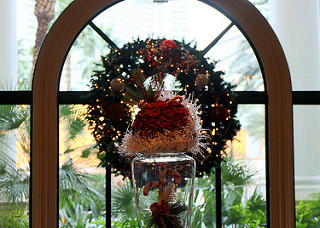

In [7]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[10]))

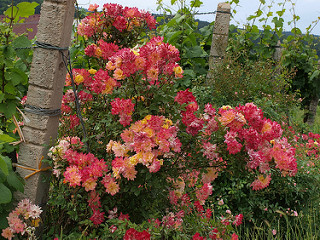

In [8]:
PIL.Image.open(str(roses[20]))

Some tulips:

In [9]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

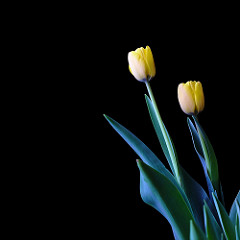

In [10]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[55]))

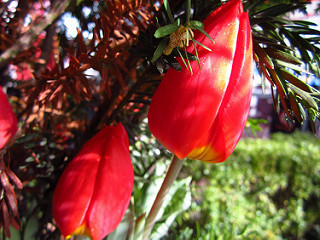

In [11]:
PIL.Image.open(tulips[5])

some dandelion:

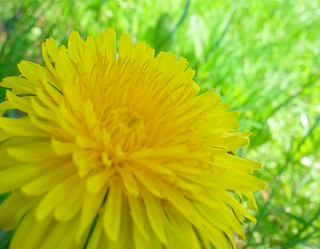

In [12]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[5]))

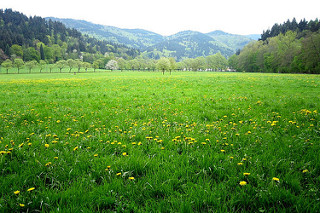

In [13]:
PIL.Image.open(str(dandelion[14]))

#Load using keras.preprocessing

Let's load these images off disk using the helpful [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) utility. This will take you from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code.

# Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 200
img_width = 200

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset = "training",
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size,
    shuffle=True
)

print("   ")

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1, # 0.1, which means 10% of the data is allocated for validation. 
    subset = "validation",
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size,
    shuffle=True

)

print("   ")


test_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset = "validation",
    seed = 123,
    image_size=(img_height, img_width),
    batch_size = batch_size,
    shuffle=True

)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.
   
Found 3670 files belonging to 5 classes.
Using 367 files for validation.
   
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


#### **Extra:**

The `tf.keras.utils.image_dataset_from_directory()` function returns a TensorFlow `tf.data.Dataset` object for training data. This dataset object is a powerful and efficient way to represent and process large amounts of data in TensorFlow.

The exact type of the training data returned by `image_dataset_from_directory()` is a `tf.data.Dataset` object that contains batches of image-label pairs. Each batch consists of a tuple where the first element represents a batch of images, and the second element represents the corresponding labels.

The specific structure and types of the returned dataset depend on the parameters you provide when calling `image_dataset_from_directory()`. By default, the images are returned as `tf.Tensor` objects with a shape corresponding to the specified image size and batch size. The labels are usually returned as integer values represented by `tf.Tensor` objects as well.

Note that you can perform various operations on the `tf.data.Dataset` object to preprocess, shuffle, batch, and augment the data before feeding it into your machine learning models.

## Create a dataset - continue

You can find the class names in the `class_names` attribute on these datasets. **These correspond to the directory names in alphabetical order**.

In [6]:
class_names = train_data.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Check the shape:

In [17]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


In [18]:
# Iterate over the dataset and try to convert the first batch to numpy array
for images, labels in train_data:
    # Convert images and labels to NumPy arrays
    images = images.numpy()
    labels = labels.numpy()
    break

In [19]:
class_names[labels[0]],labels[0], images[0]

('sunflowers',
 3,
 array([[[ 88.3      , 124.3      , 200.3      ],
         [ 89.       , 125.       , 201.       ],
         [ 88.5125   , 124.7175   , 199.615    ],
         ...,
         [226.195    ,  96.425    ,   2.6025   ],
         [235.38899  , 103.87749  ,   5.562011 ],
         [233.08197  ,  99.541954 ,   2.1464128]],
 
        [[ 89.776    , 125.776    , 201.776    ],
         [ 90.1685   , 126.1685   , 202.1685   ],
         [ 92.6525   , 130.2675   , 204.46     ],
         ...,
         [178.75     ,  72.2      ,   6.3825   ],
         [181.4474   ,  69.94748  ,   1.039493 ],
         [162.1454   ,  67.63701  ,   3.44406  ]],
 
        [[ 92.725    , 130.72499  , 205.72499  ],
         [ 92.025    , 130.025    , 205.025    ],
         [ 96.5      , 134.5375   , 208.525    ],
         ...,
         [125.8375   ,  55.324997 ,   7.312501 ],
         [157.10266  ,  81.14273  ,  16.997818 ],
         [213.83055  , 159.63573  , 125.96353  ]],
 
        ...,
 
        [[ 81.3

# Visualize the data




Retrieve a single image with its label

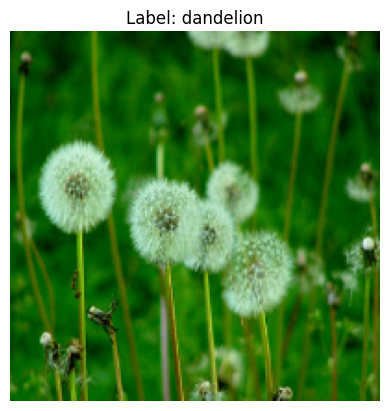

In [20]:
import matplotlib.pyplot as plt

image, label = next(iter(train_data.take(26).unbatch()))

# Plot the image
plt.imshow(image.numpy().astype("uint8"))
plt.title(f"Label: {class_names[label]}")
plt.axis("off")
plt.show()

#####Notes about the code above

When we say "flatten the batch," it means that we transform the batch, which contains multiple images and labels, into individual image-label pairs. The `unbatch()` method in TensorFlow does exactly that.

By applying `train_data.take(1).unbatch()`, we extract a single batch from the training dataset (`train_data`) using `take(1)`. Then, we use `unbatch()` to flatten this batch, resulting in a sequence of individual image-label pairs.

To illustrate this, let's consider an example with a batch of 32 images and labels:

```python
batch = [(image_1, label_1), (image_2, label_2), ..., (image_32, label_32)]
```

After applying `unbatch()`, the batch is transformed into a sequence of individual image-label pairs:

```python
unbatched = [image_1, label_1, image_2, label_2, ..., image_32, label_32]
```

This allows us to iterate over the flattened batch and retrieve one image-label pair at a time, using `next(iter(train_data.take(1).unbatch()))`.

So, when we say "flatten the batch and return a single image and label pair," it means we convert the batch into a sequence of individual image-label pairs, making it possible to extract a single pair for further processing or visualization.

## Visualize the data - continue


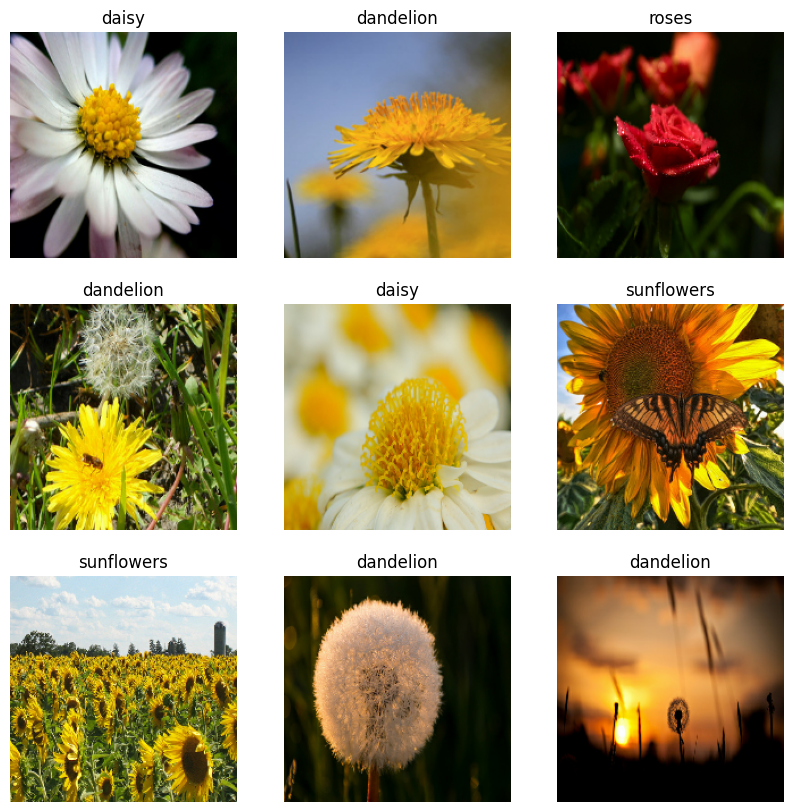

In [21]:
plt.figure(figsize=(10, 10))

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(tf.cast(images[i], dtype=tf.uint8))
    plt.title(class_names[labels[i]])
    plt.axis("off")     

#####**astype("uint8")**

The `astype("uint8")` is a method used to convert the data type of an array or tensor to an unsigned 8-bit integer (`uint8`). 

In the context of image processing and visualization, images are commonly represented as arrays of numerical values. The data type of these values determines the range and precision of the pixel intensities.

The `uint8` data type, also known as unsigned 8-bit integer, represents integer values ranging from 0 to 255. Each pixel in an image is typically represented by an 8-bit value, where 0 represents the minimum intensity (black) and 255 represents the maximum intensity (white).

When using `astype("uint8")`, you are converting the data type of an array or tensor to `uint8`. This can be useful for several purposes, such as:

1. **Data Range Limitation**: Ensuring that pixel values are within the range of 0 to 255.
2. **Memory Optimization**: Reducing the memory footprint by using a smaller data type compared to floating-point numbers.
3. **Compatibility**: Some image processing libraries or functions may expect input in the `uint8` data type.

Here's an example of how `astype("uint8")` can be used:

```python
import numpy as np

# Create an array with floating-point values
array_float = np.array([0.1, 0.5, 0.9])

# Convert the array to uint8
array_uint8 = array_float.astype("uint8")

print(array_uint8)
```

The output will be `[0 0 0]`. Since the original values in `array_float` are less than 1, the conversion to `uint8` truncates the decimal parts and converts them to integers.



**Good to remember this:**

The main difference between `int8` and `uint8` lies in the range of values they can represent and how they interpret those values.

1. **`int8`**: The `int8` data type represents signed 8-bit integers. It can store integer values in the range of -128 to 127. The most significant bit (MSB) is used as the sign bit, where 0 represents a positive value and 1 represents a negative value. The remaining 7 bits are used to represent the magnitude of the number.

2. **`uint8`**: The `uint8` data type represents unsigned 8-bit integers. It can store integer values in the range of 0 to 255. Unlike `int8`, `uint8` does not have a sign bit, so it can only represent non-negative values.



# Configure the dataset for performance 

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

# 1. Standard Model Development

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a `relu` activation function.

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
])


## Compile the model

I'll choose the `optimizers.Adam` optimizer and `losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument.

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

View all the layers of the network using the model's `summary` method:

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1

## Train the model

In [26]:
epochs=10
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
)

Epoch 1/10
81/81 [==============================] - 22s 37ms/step - loss: 1.3119 - accuracy: 0.4465 - val_loss: 1.0796 - val_accuracy: 0.5777
Epoch 2/10
81/81 [==============================] - 2s 23ms/step - loss: 0.9638 - accuracy: 0.6286 - val_loss: 0.9703 - val_accuracy: 0.6022
Epoch 3/10
81/81 [==============================] - 2s 23ms/step - loss: 0.7139 - accuracy: 0.7232 - val_loss: 0.9159 - val_accuracy: 0.6458
Epoch 4/10
81/81 [==============================] - 2s 24ms/step - loss: 0.4603 - accuracy: 0.8318 - val_loss: 0.9937 - val_accuracy: 0.6294
Epoch 5/10
81/81 [==============================] - 3s 32ms/step - loss: 0.2269 - accuracy: 0.9202 - val_loss: 1.2229 - val_accuracy: 0.6785
Epoch 6/10
81/81 [==============================] - 2s 23ms/step - loss: 0.1187 - accuracy: 0.9657 - val_loss: 1.4627 - val_accuracy: 0.6703
Epoch 7/10
81/81 [==============================] - 2s 23ms/step - loss: 0.1231 - accuracy: 0.9615 - val_loss: 1.5155 - val_accuracy: 0.5995
Epoch 8/10
8

In [27]:
model.evaluate(test_data)

23/23 [==============================] - 3s 86ms/step - loss: 1.8993 - accuracy: 0.6662


[1.8992549180984497, 0.6662125587463379]

# Visualizing  the training process

Create plots of loss and accuracy on the training and validation sets.

In [7]:
def plot_training_stage(history, epochs):
  '''
  history : the history of the model 
  '''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(1, epochs+1)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label="Training Accuracy")
  plt.plot(epochs_range, val_acc, label="Validation Accuracy")
  plt.legend(loc="upper left")
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label="Training Loss")
  plt.plot(epochs_range, val_loss, label="Validation Loss")
  plt.legend(loc="upper left")
  plt.title('Training and Validation Loss');

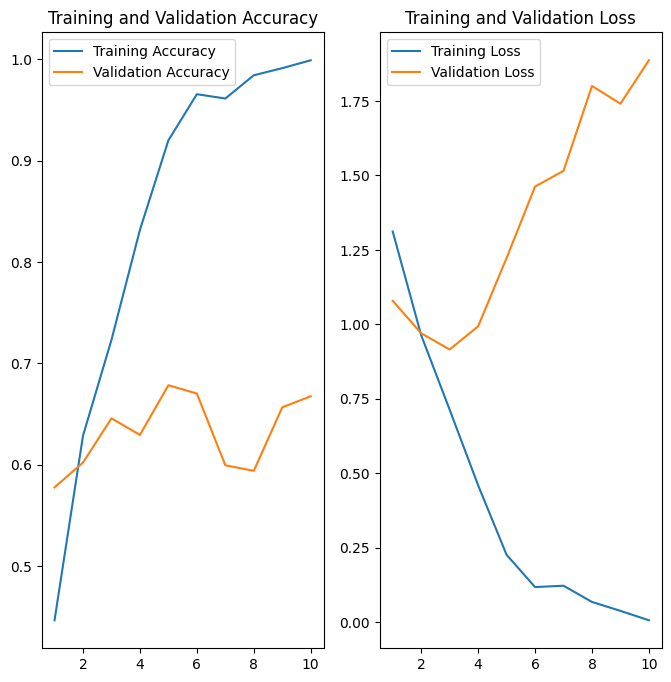

In [29]:
plot_training_stage(history=history, epochs=epochs)

# Methods to try treat overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. I'll use *data augmentation* and add *Dropout* to your model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the layers from `tf.keras.layers.experimental.preprocessing`. These can be included inside your model like other layers, and run on the GPU.

In [8]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)

])

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

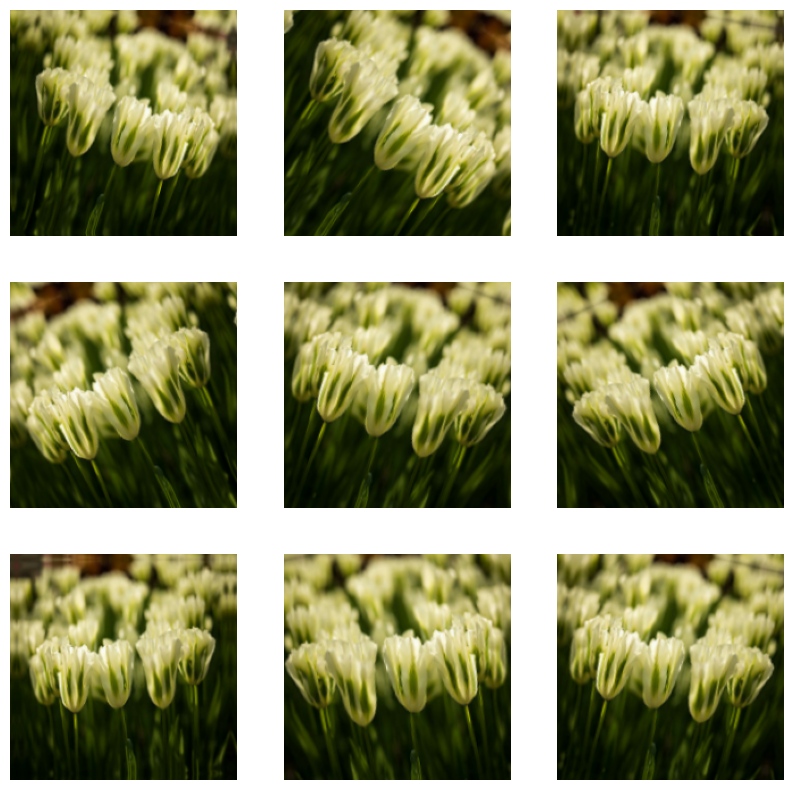

In [31]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Dropout

Another technique to reduce overfitting is to introduce [Dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization) to the network, a form of *regularization*.

When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network using `layers.Dropout`, then train it using augmented images.

# 2. After doing overfitting mitigation, let's Build a better version of the model 

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(5)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [33]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                  

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an instance of EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [35]:

# Fit the model
history_2 = model_2.fit(
            train_data,
            validation_data=val_data,
            epochs=100,
            callbacks=[early_stopping]
          )

Epoch 1/100
81/81 [==============================] - 6s 39ms/step - loss: 1.3615 - accuracy: 0.4422 - val_loss: 1.2257 - val_accuracy: 0.4932
Epoch 2/100
81/81 [==============================] - 3s 36ms/step - loss: 1.1365 - accuracy: 0.5679 - val_loss: 1.0596 - val_accuracy: 0.6349
Epoch 3/100
81/81 [==============================] - 3s 35ms/step - loss: 1.0416 - accuracy: 0.6045 - val_loss: 0.9754 - val_accuracy: 0.6403
Epoch 4/100
81/81 [==============================] - 3s 35ms/step - loss: 0.9661 - accuracy: 0.6450 - val_loss: 0.9559 - val_accuracy: 0.6403
Epoch 5/100
81/81 [==============================] - 3s 35ms/step - loss: 0.9081 - accuracy: 0.6617 - val_loss: 1.1033 - val_accuracy: 0.6022
Epoch 6/100
81/81 [==============================] - 3s 36ms/step - loss: 0.8646 - accuracy: 0.6816 - val_loss: 0.8375 - val_accuracy: 0.7057
Epoch 7/100
81/81 [==============================] - 3s 35ms/step - loss: 0.8266 - accuracy: 0.6886 - val_loss: 0.7950 - val_accuracy: 0.6948
Epoch 

In [36]:
model_2.evaluate(test_data)


23/23 [==============================] - 0s 12ms/step - loss: 0.7916 - accuracy: 0.7316


[0.791649341583252, 0.7316076159477234]

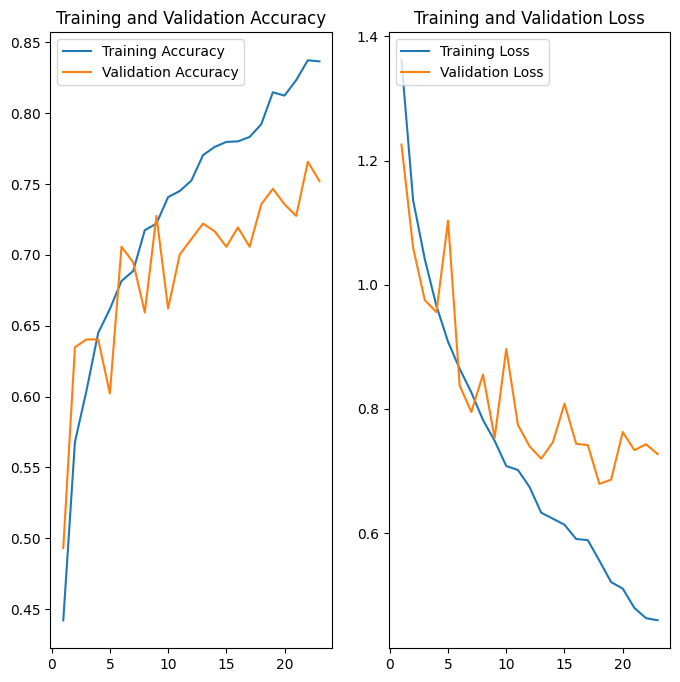

In [40]:
plot_training_stage(history_2, epochs=23)

# doing some prediction on the testing set and Visualizing the results

In [9]:
# do predication and vaisulize it
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

def do_predication(model,folder):
  
  # extract both the images and their corresponding labels
  images_unseen = []
  labels_unseen = []

  for images, labels in folder:
    images_unseen.extend(images.numpy())
    labels_unseen.extend(labels.numpy())
  # Convert the lists to numpy arrays
  images = np.array(images_unseen)
  labels = np.array(labels_unseen)

  ## let plot here 
  plt.figure(figsize=(7, 7))
  for i in range(4):
      R = random.randint(0, len(images))
      
      # Create prediction and target
      target_image = images[R]
      pred = model.predict(target_image.reshape(1, 200, 200, 3))
      pred_probs = tf.nn.softmax(pred)  # Apply softmax activation
      pred_label = class_names[np.argmax(pred_probs)]  #  apply argmax
      true_label = class_names[labels[R]]
      ax = plt.subplot(2, 2, i+1)
      # Convert the image to PIL Image object
      target_image_pil = Image.fromarray(np.uint8(target_image))
      # Apply the desired color map (e.g., 'viridis')
      target_image_pil = target_image_pil.convert('RGB')
      # Plot the image
      plt.imshow(target_image_pil)
      # Change the color of the titles depending on if the prediction is right or wrong
      if pred_label == true_label:
          color = "green"
      else:
          color = "red"
      
      # Add xlabel information (prediction/true_label)
      plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                        100 * tf.reduce_max(pred_probs),
                                                        true_label), color=color)
        
  plt.show()

1/1 [==============================] - 0s 34ms/step


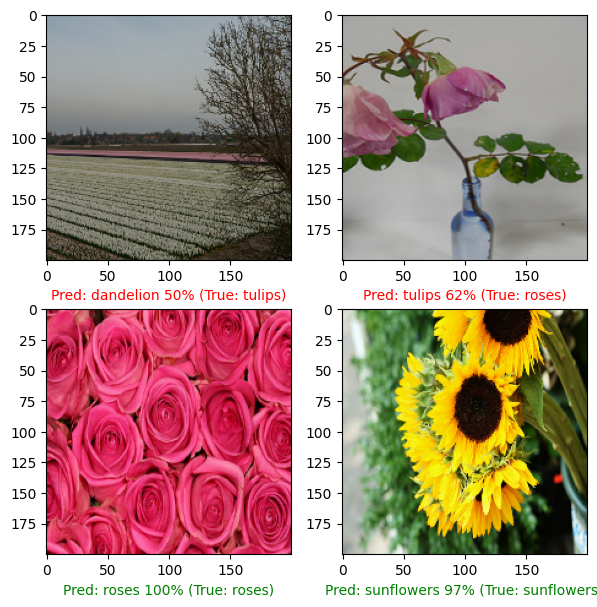

In [39]:
do_predication(model_2,test_data)

# 3.Data Expansion

In [10]:
import tensorflow as tf
import os
import zipfile

unseen_data_zip = '/content/drive/MyDrive/Project/images_web_scraping.zip'
unseen_data_extracted_dir = '/content/unseen_data'  # Specify the path to extract the files

# Extract the contents of the ZIP file to the specified directory
with zipfile.ZipFile(unseen_data_zip, 'r') as zip_ref:
    zip_ref.extractall(unseen_data_extracted_dir)

# Specify the image directory path
unseen_data_dir = os.path.join(unseen_data_extracted_dir, 'images_web_scraping')

img_height, img_width = 200, 200
batch_size = 32

# Load the new dataset
new_Data = tf.keras.preprocessing.image_dataset_from_directory(
    unseen_data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)
# Get the number of classes in the new dataset
num_classes = len(new_Data.class_names)

# Load the old dataset
old_Data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Combine the datasets
combined_Data = new_Data.concatenate(old_Data)

# Create empty lists to store the combined images and labels tensors
combined_images = []
combined_labels = []

# Iterate over the combined dataset and append the tensors to the lists
for images, labels in combined_Data:
    combined_images.append(images)
    combined_labels.append(labels)

# Concatenate the image and label tensors using tf.concat
combined_images = tf.concat(combined_images, axis=0)
combined_labels = tf.concat(combined_labels, axis=0)

print(combined_images.shape)
print(combined_labels.shape)


Found 5000 files belonging to 1 classes.
Found 3670 files belonging to 5 classes.
(8670, 200, 200, 3)
(8670,)


In [11]:
# Define the split ratios
train_ratio = 0.7
val_ratio = 0.1
test_ratio = 0.2

# Calculate the dataset sizes
num_samples = combined_images.shape[0]
num_train_samples = int(train_ratio * num_samples)
num_val_samples = int(val_ratio * num_samples)

# Create a combined dataset
combined_dataset = tf.data.Dataset.from_tensor_slices((combined_images, combined_labels))

# Shuffle the dataset
combined_dataset = combined_dataset.shuffle(num_samples, seed=42)

# Split the dataset into train, validation, and test sets
train_dataset = combined_dataset.take(num_train_samples)
remaining_dataset = combined_dataset.skip(num_train_samples)
val_dataset = remaining_dataset.take(num_val_samples)
test_dataset = remaining_dataset.skip(num_val_samples)

# Batch the datasets
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [17]:
for images, labels in test_dataset.take(1):
  print(images.shape)
  print(labels.shape)
  break


(32, 200, 200, 3)
(32,)


In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    data_augmentation,
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(5)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an instance of EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Fit the model
history_3 = model_3.fit(
            train_dataset,
            validation_data=val_dataset,
            epochs=50,
            
          )

Epoch 1/50
190/190 [==============================] - 11s 41ms/step - loss: 1.0830 - accuracy: 0.6443 - val_loss: 0.9445 - val_accuracy: 0.6459
Epoch 2/50
190/190 [==============================] - 7s 38ms/step - loss: 0.8869 - accuracy: 0.6639 - val_loss: 0.7959 - val_accuracy: 0.7128
Epoch 3/50
190/190 [==============================] - 7s 38ms/step - loss: 0.8192 - accuracy: 0.6876 - val_loss: 0.7831 - val_accuracy: 0.7001
Epoch 4/50
190/190 [==============================] - 7s 37ms/step - loss: 0.7592 - accuracy: 0.7141 - val_loss: 0.7524 - val_accuracy: 0.7197
Epoch 5/50
190/190 [==============================] - 7s 38ms/step - loss: 0.7162 - accuracy: 0.7357 - val_loss: 0.6711 - val_accuracy: 0.7416
Epoch 6/50
190/190 [==============================] - 8s 40ms/step - loss: 0.6773 - accuracy: 0.7489 - val_loss: 0.5639 - val_accuracy: 0.8005
Epoch 7/50
190/190 [==============================] - 7s 37ms/step - loss: 0.6438 - accuracy: 0.7588 - val_loss: 0.5436 - val_accuracy: 0.785

In [22]:
loaded_model.evaluate(test_dataset)

55/55 [==============================] - 1s 16ms/step - loss: 0.2170 - accuracy: 0.9273


[0.21704629063606262, 0.9273356199264526]


* With early stopping (29 epochs):
```
55/55 [==============================] - 6s 22ms/step - loss: 0.2314 - accuracy: 0.9216
[0.23138736188411713, 0.9215686321258545]
```
* 50 epochs:
```
55/55 [==============================] - 1s 16ms/step - loss: 0.2170 - accuracy: 0.9273
[0.21704629063606262, 0.9273356199264526]
```


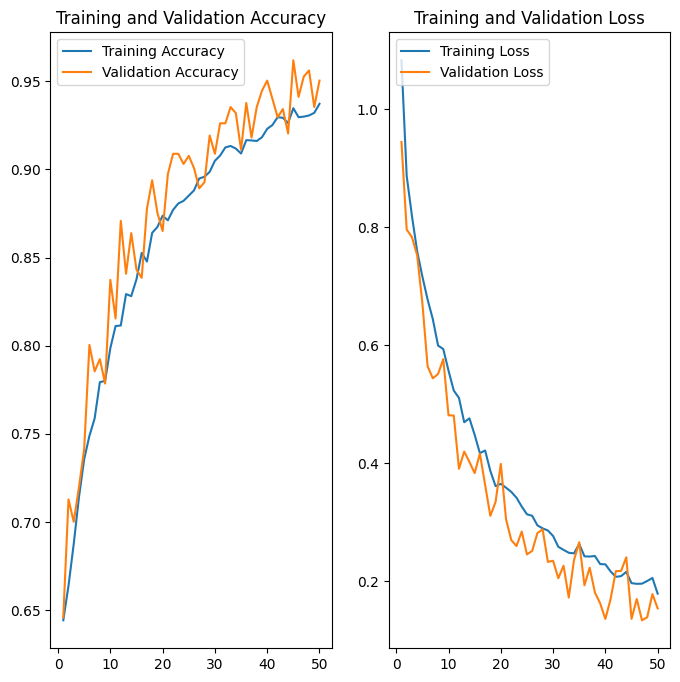

In [24]:
plot_training_stage(history_3, epochs=50)

1/1 [==============================] - 0s 21ms/step


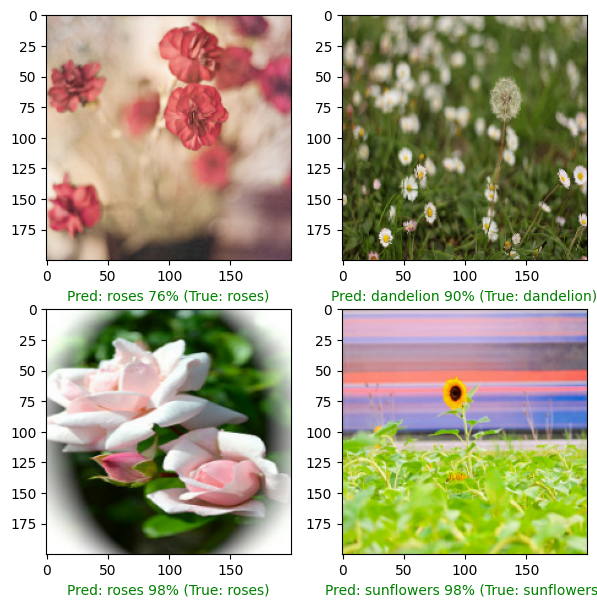

In [27]:
do_predication(model_3, test_dataset)

# Save the model

In [21]:
from tensorflow.keras.models import save_model
save_model(model_3,'model_4.h5')